In [3]:
from datasets import load_dataset
import IPython.display as ipd

dataset = load_dataset("Feanix/gtzan-10-sec", cache_dir="./audio")

c:\Users\jefersson\Desktop\ANACONDA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#sacar descriptores mfcc
from extract_audio_functions import *

# Extraer
data=dataset["train"]
mfccs_audios=[]
for i in range(len(dataset["train"])):
    
    #extraccion de 0.5 segundos
    x=extract_mfcc_from_array(
        data[i]["audio"]["array"],sr=data[i]["audio"]["sampling_rate"],tiempo=0.5)
    
    mfccs_audios.append(x)

# shape (20x13)   3k veces 
# apilamos

todos_los_vectores = np.vstack(mfccs_audios)
print(todos_los_vectores.shape)  # (3k x 20 , 13)



#show_mfcc(mfcc_matrix)

(59760, 13)


(20, 13)


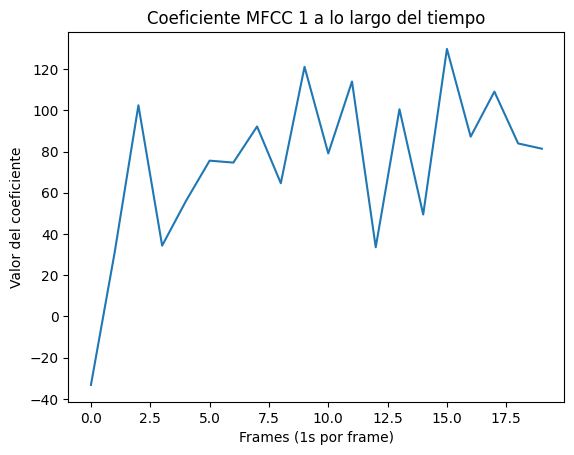

In [21]:
print(todos_los_vectores[:20,:].shape)
show_mfcc(todos_los_vectores[:20,:])


In [ ]:
#NORMALIZAR LA DATA PARA EL Kmeans 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
mfcc_normalizado=scaler.fit_transform(todos_los_vectores)

print(mfcc_normalizado)  # (3k x 20 , 13)

# Sacamos lo Codeword   -> acoustic word
Kmeans =construir_codebook(mfcc_normalizado,n_clusters=10)


In [ ]:
print(Kmeans.cluster_centers_.shape)  # (10, 13)
print(Kmeans.cluster_centers_)        # valores de cada centroide


In [28]:

X = []
y = []

label_names = dataset["train"].features["genre"].names
diccionary={}
for i in range(len(mfccs_audios)):
    mfcc = mfccs_audios[i]
    hist = histogram_audio(mfcc, Kmeans)
    
    X.append(hist)
    y.append(data[i]["genre"])  # etiqueta numérica

    diccionary[str(i)] = {
    "genre": label_names[data[i]['genre']],
    "hist": hist.tolist()
    }


    # (DEBUG) mostrar mapeo
    print(f"Audio {i} → {label_names[data[i]['genre']]}")

# Guardar en JSON

import json
with open("audio_histograms.json", "w") as f:
    json.dump(diccionary, f, indent=4)



Audio 0 → blues
Audio 1 → blues
Audio 2 → blues
Audio 3 → blues
Audio 4 → blues
Audio 5 → blues
Audio 6 → blues
Audio 7 → blues
Audio 8 → blues
Audio 9 → blues
Audio 10 → blues
Audio 11 → blues
Audio 12 → blues
Audio 13 → blues
Audio 14 → blues
Audio 15 → blues
Audio 16 → blues
Audio 17 → blues
Audio 18 → blues
Audio 19 → blues
Audio 20 → blues
Audio 21 → blues
Audio 22 → blues
Audio 23 → blues
Audio 24 → blues
Audio 25 → blues
Audio 26 → blues
Audio 27 → blues
Audio 28 → blues
Audio 29 → blues
Audio 30 → blues
Audio 31 → blues
Audio 32 → blues
Audio 33 → blues
Audio 34 → blues
Audio 35 → blues
Audio 36 → blues
Audio 37 → blues
Audio 38 → blues
Audio 39 → blues
Audio 40 → blues
Audio 41 → blues
Audio 42 → blues
Audio 43 → blues
Audio 44 → blues
Audio 45 → blues
Audio 46 → blues
Audio 47 → blues
Audio 48 → blues
Audio 49 → blues
Audio 50 → blues
Audio 51 → blues
Audio 52 → blues
Audio 53 → blues
Audio 54 → blues
Audio 55 → blues
Audio 56 → blues
Audio 57 → blues
Audio 58 → blues
Audio 5

In [3]:
# TEST WITH MY MUSIC
from extract_audio_functions import transform_mp3_to_wav


recortar_si_posible("./audio/","colplay","./audio/")


NameError: name 'AudioSegment' is not defined